In [11]:
#Install Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline


In [28]:
data=pd.read_csv('laptop_price.csv',encoding='latin1')

data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [31]:
#Extract X-axis and Y-axis screen resolution dimensions
def findXresolution(s):
  return s.split()[-1].split("x")[0]
def findYresolution(s):
  return s.split()[-1].split("x")[1]
#finding the x_res and y_res from screen resolution
data['X_res'] = data['ScreenResolution'].apply(lambda x: findXresolution(x))
data['Y_res'] = data['ScreenResolution'].apply(lambda y: findYresolution(y))
#convert to numeric
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')

In [32]:
#Replacing inches, X and Y resolution to PPI
data['ppi'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')
data.corr()['Price_euros'].sort_values(ascending=False)

C:\Users\SilverOak\AppData\Local\Temp\ipykernel_12068\1158041396.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price_euros'].sort_values(ascending=False)


Price_euros    1.000000
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Inches         0.068197
laptop_ID      0.067830
Name: Price_euros, dtype: float64

In [33]:
#Extract Touch screen information
data['Touchscreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)


In [34]:

## remove gb and kg from Ram and weight and convert the cols to numeric
data['Ram'] = data['Ram'].str.replace("GB", "")
data['Weight'] = data['Weight'].str.replace("kg", "")
data['Ram'] = data['Ram'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')

In [35]:
#extract IPS column
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [36]:
#Get which OP sys
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
data['os'] = data['OpSys'].apply(cat_os)
data.drop(columns=['OpSys'],inplace=True)

In [37]:
# Which brand GPU is in laptop
data['Gpu_brand'] = data['Gpu'].apply(lambda x:x.split()[0])
#there is only 1 row of ARM GPU so remove it
data = data[data['Gpu_brand'] != 'ARM']
data.drop(columns=['Gpu'],inplace=True)

In [38]:

#preprocessing
data['Memory'] = data['Memory'].astype(str).replace('.0', '', regex=True)
data["Memory"] = data["Memory"].str.replace('GB', '')
data["Memory"] = data["Memory"].str.replace('TB', '000')
new = data["Memory"].str.split("+", n = 1, expand = True)
data["first"]= new[0]
data["first"]=data["first"].str.strip()
data["second"]= new[1]
data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
data['first'] = data['first'].str.replace(r'D', '')
data["second"].fillna("0", inplace = True)
data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
data['second'] = data['second'].str.replace(r'D', '')
#binary encoding
data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
#only keep integert(digits)
data['second'] = data['second'].str.replace(r'D', '')
# Extract only numeric values from 'first' and 'second'
data["first"] = data["first"].apply(lambda x: ''.join(filter(str.isdigit, str(x))))
data["second"] = data["second"].apply(lambda x: ''.join(filter(str.isdigit, str(x))))

# Convert to numeric
data["first"] = pd.to_numeric(data["first"], errors='coerce')
data["second"] = pd.to_numeric(data["second"], errors='coerce')

# Handle missing values (NaN) after conversion
data["first"].fillna(0, inplace=True)
data["second"].fillna(0, inplace=True)
#convert to numeric
data["first"] = data["first"].astype(int)
data["second"] = data["second"].astype(int)
#finalize the columns by keeping value
data["HDD"]=(data["first"]*data["Layer1HDD"]+data["second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1Flash_Storage"]+data["second"]*data["Layer2Flash_Storage"])
#Drop the un required columns
data.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [39]:
data.drop(columns=['ScreenResolution','Product','Inches','X_res','Y_res'],inplace=True)

In [40]:
#first we will extract Name of CPU which is first 3 words from Cpu column and then we will check which processor it is
def fetch_processor(x):
  cpu_name = " ".join(x.split()[0:3])
  if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
    return cpu_name
  elif cpu_name.split()[0] == 'Intel':
    return 'Other Intel Processor'
  else:
    return 'AMD Processor'
data['Cpu_brand'] = data['Cpu'].apply(lambda x: fetch_processor(x))

In [41]:
data.drop(columns=['Hybrid','Flash_Storage','Memory','Cpu'],inplace=True)

In [64]:
data.head()

,laptop_ID,Company,TypeName,Ram,Weight,Price_euros,Cpu_brand,ppi,Touchscreen,Ips,os,Gpu_brand,HDD,SSD
0,1,Apple,Ultrabook,8,1.37,1339.69,Intel Core i5,226.983005,0,1,Mac,Intel,0,128
1,2,Apple,Ultrabook,8,1.34,898.94,Intel Core i5,127.677940,0,0,Mac,Intel,0,0
2,3,HP,Notebook,8,1.86,575.00,Intel Core i5,141.211998,0,0,Others/No OS/Linux,Intel,0,256
3,4,Apple,Ultrabook,16,1.83,2537.45,Intel Core i7,220.534624,0,1,Mac,AMD,0,512
4,5,Apple,Ultrabook,8,1.37,1803.60,Intel Core i5,226.983005,0,1,Mac,Intel,0,256


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
!pip install xgboost
from xgboost import XGBRegressor

In [46]:
X = data.drop(columns=['Price_euros','laptop_ID'])

y = np.log(data['Price_euros'])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [47]:
X.head()

,Company,TypeName,Ram,Weight,Cpu_brand,ppi,Touchscreen,Ips,os,Gpu_brand,HDD,SSD
0,Apple,Ultrabook,8,1.37,Intel Core i5,226.983005,0,1,Mac,Intel,0,128
1,Apple,Ultrabook,8,1.34,Intel Core i5,127.677940,0,0,Mac,Intel,0,0
2,HP,Notebook,8,1.86,Intel Core i5,141.211998,0,0,Others/No OS/Linux,Intel,0,256
3,Apple,Ultrabook,16,1.83,Intel Core i7,220.534624,0,1,Mac,AMD,0,512
4,Apple,Ultrabook,8,1.37,Intel Core i5,226.983005,0,1,Mac,Intel,0,256


In [52]:
#Implement Pipeline for training and testing
step1 = ColumnTransformer(transformers=[

('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,4,8,9])

],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
random_state=3,

max_samples=0.5,

max_features=0.75,

max_depth=15)

pipe = Pipeline([

('step1',step1),

('step2',step2)])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\SilverOak\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8851248992787589
MAE 0.1582580989727215


In [57]:
#Task 1 : Single Linear Regression
lm = LinearRegression()

X = X[['ppi']]
Y = data['Price_euros']

lm.fit(X,Y)

Yhat=lm.predict(X)

C:\Users\SilverOak\AppData\Local\Temp\ipykernel_12068\4099226682.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(data['Price_euros'], hist=False, color="r", label="Actual Value")
C:\Users\SilverOak\AppData\Local\Temp\ipykernel_12068\4099226682.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

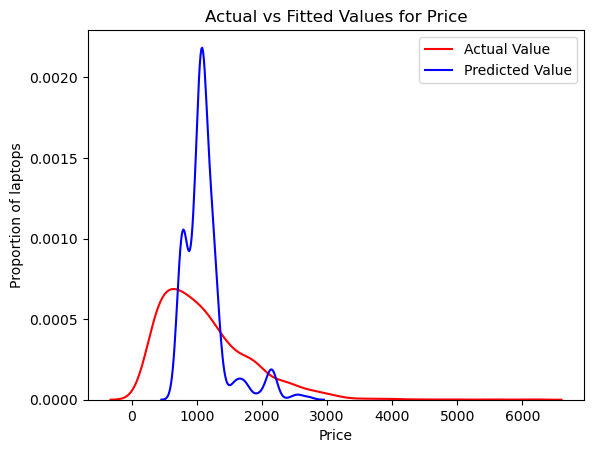

In [58]:
ax1 = sns.distplot(data['Price_euros'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [60]:
#Evaluate the Mean Squared Error and R^2 score values for the model.
from sklearn.metrics import mean_squared_error, r2_score
mse_slr = mean_squared_error(data['Price_euros'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.22597513184837692
The mean square error of price and predicted value is:  378070.64045900333


In [67]:
#Task 2 - Multiple Linear Regression
lm1 = LinearRegression()
Z = data[['ppi','Ram','Ips','HDD','SSD','Weight']]
lm1.fit(Z,Y)
Y_hat = lm1.predict(Z)

C:\Users\SilverOak\AppData\Local\Temp\ipykernel_12068\625875473.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Price_euros'], hist=False, color="r", label="Actual Value")
C:\Users\SilverOak\AppData\Local\Temp\ipykernel_12068\625875473.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

Text(0, 0.5, 'Proportion of laptops')

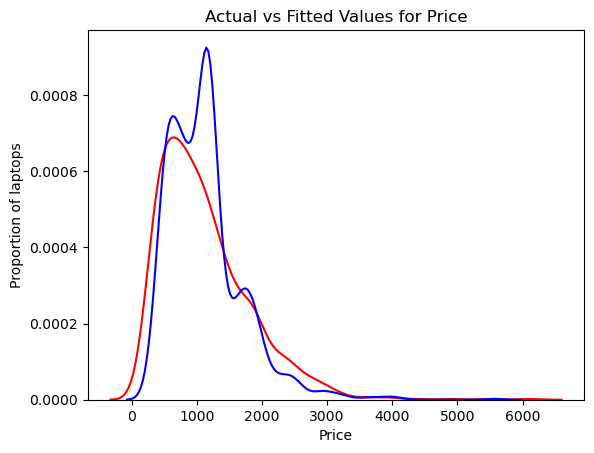

In [68]:
ax1 = sns.distplot(df['Price_euros'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

C:\Users\SilverOak\AppData\Local\Temp\ipykernel_12068\1492149633.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(df['Price_euros'], hist=False, color="r", label="Actual Value")
C:\Users\SilverOak\AppData\Local\Temp\ipykernel_12068\1492149633.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

Text(0, 0.5, 'Proportion of laptops')

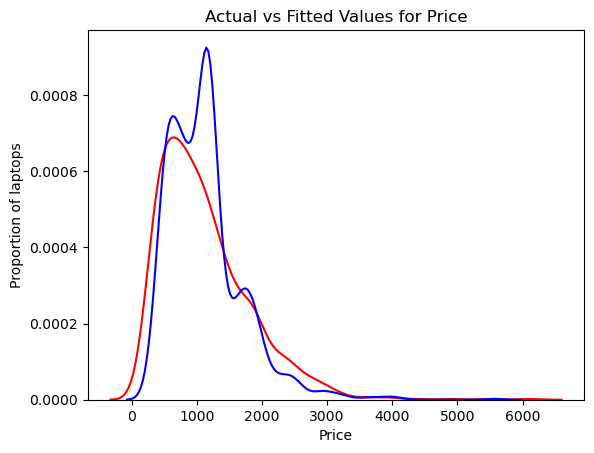

In [69]:
ax2 = sns.distplot(df['Price_euros'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

In [70]:
# Task 3 - Polynomial Regression
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

TypeError: expected 1D vector for x

KeyError: 'X'

In [71]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

In [72]:
PlotPolly(p1, X, Y, 'ppi')

NameError: name 'p1' is not defined

In [76]:
# Task 4 - Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

In [77]:
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  142793.61248173958
R^2 for multi-variable polynomial pipeline is:  0.7076583176628404
